<center>
    <u><font size="36">Sparse Data Solutions</font></u>
    <h2>by Rebecca Hinrichs</h2>
    <h4>SPRING 2023</h4>
</center>

--- 

<center><h2>Part I</h2></center>

---

> Explain Laplace smoothing.

Laplace smoothing solves the problem known as "Zero Frequency" by adding a small value into a conditional probability formula in order to allow continuity in conditionally independent models trained on sparse data. For example, if a data point were introduced to a Naïve-Bayesian model via a testing data subset which the model had not seen during its training phase, it would produce an error due to the zero-probability condition it had formulated based on its zero prior representation of that data point. The Bayesian Model is given by

$$ \text{posterior probability} = \frac{\text{joint likelihood}*\text{prior probability}}{\text{evidence}} $$

Since the probability of that data point having previously been classified would produce a $0/0$ result due to no evidence and no prior, the small added value allows continuity for variables and can be represented by:

$$ P(x|y) = \frac{P(x \cap y) + 1}{P(y) + k} $$

where $k$ represents the number of observed values for the new parameter. This technique is necessary for generative learning models like the Naive-Bayes multivariate classifier particularly when applied to sparse matrices with missing or zero values.

--- 

<center><h2>Part II</h2></center>

---

<b>Purpose:</b> The goal of this assignment is to build a Naïve-Bayes algorithm to predict whether a passenger on the Titanic survived or not.

<b>Data:</b> We were instructed to import the dataset `titanic.csv` available in our class OneDrive folder. The data set provides information on the fate of passengers on the fatal maiden voyage of the ocean liner "Titanic", summarized according to survival (target variable with $1$= survived and $0$= died) and explanatory variables: `Name`, `Pclass` (passenger class), `Sex`, `Age`, `SibSp` (total number of siblings including the spouse traveling with the passenger), `Parch` (total number of parents and children traveling with the passenger), `Ticket`, `Fare`, `Cabin`, and `Embarked` (where the traveler mounted from: Southampton, Cherbourg, or Queenstown).<br>

<b>Approach:</b> We will build & train a Naïve-Bayes model using `scikit-learn`'s built-in methods and use it to predict the survival of a passenger based on input values.

--- -

> 1. Import the data set into pandas data frame

In [1]:
# Import Libraries & Dependencies
import pandas as pd
import numpy as np

# Import Dataset
df = pd.read_csv('titanic.csv')
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


> 2.  Split the data into training and testing sets

In [2]:
# Define the feature and target variables for training, testing
y = df['Survived']
X = df.drop('Survived', axis=1)

# Split the data into training & testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, random_state=42)
# Report the dataset shapes
print(f'\nTraining Shape :: {X_train.shape}')
print(f'Training Labels :: {y_train.shape}')
print(f'\nTesting Shape :: {X_test.shape}')
print(f'Testing Labels :: {y_test.shape}\n')


Training Shape :: (623, 11)
Training Labels :: (623,)

Testing Shape :: (268, 11)
Testing Labels :: (268,)




NULL values :: 0    :: 0.0%

Survived
0    392
1    231
Name: count, dtype: int64


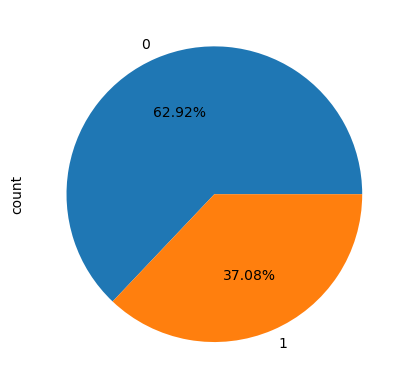

In [3]:
# Target variable analysis
print(f'\nNULL values :: {y_train.isna().sum():<5}:: {y_train.isna().sum()/y_train.size:.1%}\n')
print(y_train.value_counts())
y_train.value_counts().plot(kind='pie', autopct='%.2f%%');

In [4]:
# Feature analysis
print(f'\nNULL values :: {X.isna().sum().sum():<5}:: {X.isna().sum().sum()/X.size:.1%}')
print(f'ZERO values :: {(X==0).sum().sum():<5}:: {(X==0).sum().sum()/X.size:.1%}\n')
X.info()


NULL values :: 866  :: 8.8%
ZERO values :: 1301 :: 13.3%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


> 3. Select one or more explanatory variables you would like to use.

First we'll look for unhelpful columns.

In [5]:
# Find irrelevant features
chopblock = ['PassengerId','Name','Ticket','Cabin','Embarked']
X_check = pd.DataFrame(X[chopblock])
for col in X_check.columns:
    uniques, nulls, count = len(set(X_check[col])), X_check[col].isna().sum(), len(X_check[col])
    print(f'Unique {col}s :: {uniques:<5}:: {uniques/count:.1%}')
    print(f'NULL {col}s :: {nulls:<5}:: {nulls/count:.1%}\n')

Unique PassengerIds :: 891  :: 100.0%
NULL PassengerIds :: 0    :: 0.0%

Unique Names :: 891  :: 100.0%
NULL Names :: 0    :: 0.0%

Unique Tickets :: 681  :: 76.4%
NULL Tickets :: 0    :: 0.0%

Unique Cabins :: 148  :: 16.6%
NULL Cabins :: 687  :: 77.1%

Unique Embarkeds :: 4    :: 0.4%
NULL Embarkeds :: 2    :: 0.2%



`Name` and `PassengerId` are unique identifiers per observation, so we can drop those.

`Ticket` may be informative; `Cabin` poses a challenge with its high count of missing values; `Embarked` looks to be a strong categorical variable. We'll proceed to investigate these 3.

In [6]:
# Investigate `Ticket`
(df["Ticket"]).value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [7]:
# Investigate what does 7 counts on 1 ticket mean
df[df["Ticket"]=="347082"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


Based on the genders, names and ages of the passengers, we see in this example that `Ticket` with value "347082" belonged to a family of $7$: 2 adults aged 39 each and 5 children ages 2-11. All of them have the same `Fare` amount, `Embarked` location, `PClass` of 3, and `Cabin` unlisted. Additionally, they all result in `Survived` outcomes of $0$. We won't be keeping `PassengerId` or `Name`, so besides `Age` which distinguishes these passengers from each other, let's proceed to explore their only remaining differing variables: `SibSp` an d`Parch`. 

The parents each have `SibSp` values of $1$ and `Parch` values of $5$, since they each count each other as spouse and they also both have 5 children. Their children each have `SibSp` values of $4$ since they are all siblings with one another, and `Parch` values of $2$ since each child has both parents on board. Given this example, we see that `SibSp` and `Parch` are interrelated and correlated to other passengers onboard. In order to keep these variables as significant without any quantitative skew, we'll convert `SibSp` and `Parch` to a single Bernoulli variable to indicate whether the passenger had family on board or not. We can call this variable `has_family` and drop `SibSp` and `Parch`.

Since `Ticket` is a group identifier but its contents are irrelevant to our target variable, we can alternatively encode this variable in lieu of our Bernoulli `has_family` option as relevant to survival. Since families tended to stick together- room together, pay the same fare together, be in the same class together, embark together, and incidentally quite possibly survive together- we may find some value in retaining `Ticket` for its grouping mechanism.

Therefore, we will combine the simplification of `has_family` with the more discriminatory grouping utility of `Ticket` and introduce instead a variable called `qty_family` which combines the grouping utility of `Ticket` with `SibSp` and `Parch`, effectively dropping these 3 variables.

In [8]:
# Investigate `Cabin`
(df["Cabin"]).value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [9]:
# Investigate what does 4 counts in 1 cabin mean
df[df["Cabin"]=="G6"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S


In [10]:
# Investigate what does 4 counts in 3 cabins mean
df[df["Cabin"]=="C23 C25 C27"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S


In [11]:
# Investigate whether 1 of multiple cabins is repeated elsewhere
df[df["Cabin"].apply(lambda x: 'C22' in str(x))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.55,C22 C26,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.55,C22 C26,S


In [12]:
# Investigate whether one family on one ticket has differing cabin entries
df[df["Name"].apply(lambda x: 'Fortune' in str(x))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S


In [13]:
# Investigate what does 3 counts in 1 cabin mean
df[df["Cabin"]=="F33"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5,F33,S
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0,F33,S
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5,F33,S


In [14]:
# Investigate what does 1 count in 1 cabin mean
df[df["Cabin"]=="C54"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C


In [15]:
# Investigate what NaN `Cabin` values mean
no_cabins, cabins = df[(df["Cabin"]).isna()], df[(df["Cabin"]).notna()]
print(f'\nPercentage of `Cabin`==`NaN` ::\n'
      f'{round((len(df[df["Cabin"].isna()]) / len(df["Cabin"]))*100,2)}')
print(f'\nPercentage of `Cabin`!=`NaN` ::\n'
      f'{round((len(df[df["Cabin"].notna()]) / len(df["Cabin"]))*100,2)}\n')
print(f'- - - - - - - - - - - - - - - - - - - - - - - -')
print(f'\nPercentage of `Pclass` where `Cabin`==`NaN` ::\n'
      f'{round((no_cabins["Pclass"].value_counts() / df["Pclass"].value_counts())*100,2)}')
print(f'\nPercentage of `Survived` where `Cabin`==`NaN` ::\n'
      f'{round((no_cabins["Survived"].value_counts() / df["Survived"].value_counts())*100,2)}\n')


Percentage of `Cabin`==`NaN` ::
77.1

Percentage of `Cabin`!=`NaN` ::
22.9

- - - - - - - - - - - - - - - - - - - - - - - -

Percentage of `Pclass` where `Cabin`==`NaN` ::
Pclass
1    18.52
2    91.30
3    97.56
Name: count, dtype: float64

Percentage of `Survived` where `Cabin`==`NaN` ::
Survived
0    87.61
1    60.23
Name: count, dtype: float64



`Cabin` has relatively low uniqueness but contains nearly $80\%$ in `NaN` values, which will be difficult to impute correctly (though could be fun to try in a future project). Based on our investigation, we see a varying `Survived` label from passengers sharing one or multiple cabins, and we see that `Cabin` values- if they exist- are unique, though some passengers have several. Those with several cabins listed under their names appear to be already correlated with both `Fare` and `Pclass`, as we see in our example of the "Fortune" family. Some `Pclass`==3 members, such as in our investigation of "G6", had a single cabin with 2 women having one daughter each on 2 separate tickets with a small difference in fare, and the families differed in survival outcomes. Additionally, some cabins had 3 unrelated tenants such as our "F33" example, and other cabins had a single tenant such as "C54". Given the variability of tenants per cabin and the number of cabins per passenger, the string-valued contents within `Cabin` appear to be less correlated to `Survived` than the Bernoulli fact that a passenger <i>had</i> a cabin or not. Therefore we'll drop `Cabin` in favor of another simple Bernoulli indicating whether the passenger had a cabin or not, which we'll call `has_cabin`.

In [16]:
# Convert `Ticket` to quantifier of on-board family memebers `qty_family`
qty_family = df.groupby('Ticket')['Ticket'].transform('count') - 1
X_train['qty_family'] = qty_family[X_train.index]
X_test['qty_family'] = qty_family[X_test.index]

# Convert 'Cabin' to Bernoulli 'has_cabin' & add to X
X_train['has_cabin'] = X_train['Cabin'].notna()
X_test['has_cabin'] = X_test['Cabin'].notna()

# Drop irrelevant features
X_train = X_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis=1)
X_test = X_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis=1)

# Demonstrate sample
corr_check = pd.concat([y_train, X_train], axis=1)
display(corr_check)

,Survived,Pclass,Sex,Age,Fare,Embarked,qty_family,has_cabin
445,1,1,male,4.0,81.8583,S,0,True
650,0,3,male,NaN,7.8958,S,0,False
172,1,3,female,1.0,11.1333,S,2,False
450,0,2,male,36.0,27.7500,S,2,False
314,0,2,male,43.0,26.2500,S,2,False
...,...,...,...,...,...,...,...,...
106,1,3,female,21.0,7.6500,S,0,False
270,0,1,male,NaN,31.0000,S,1,False
860,0,3,male,41.0,14.1083,S,0,False
435,1,1,female,14.0,120.0000,S,3,True


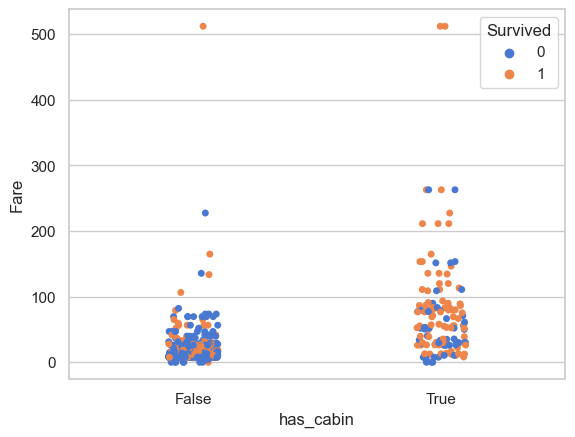

In [17]:
# Compare survival rate for passengers with and without cabins against their fare
import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.stripplot(data=corr_check, x="has_cabin", y="Fare", hue="Survived")

The Boolean `has_cabin` shows a strong relationship to `Survived`, with a much more distributed density with `Fare` and a higher proportion of gold dots signifying survival. When `has_cabin`="False", we observe a higher density of `Survived`=0 and lower `Fare` combined. 

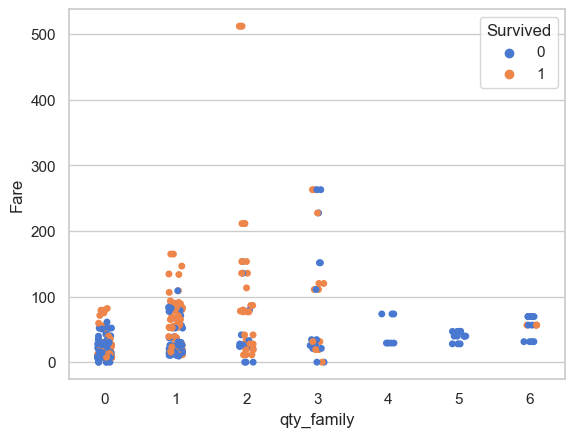

In [18]:
# Compare survival rate for passengers with and without families against their fare
ax = sns.stripplot(data=corr_check, x="qty_family", y="Fare", hue="Survived")

`qty_family` demonstrates a strong density distribution of `Fare` with 1-3 family members, and proportionally increased survival rates as well- the gold dots appear to be near-equal or greater than the blue dots indicating survival between these ranges, spreading out as `Fare` increases. Larger families apear to have lower `Fare` rates and lower instances of survival.

Now we'll check out the highest 3 points in both graphs, indicating where `has_cabin`="True" and `qty_family`==2 (for 2 of the 3) but `Survived`==$1$ (true) for all 3 high-fare points. These points appear to be extremes in `Fare`.

In [19]:
# Check for outliers in `Fare`
X_train.Fare.max(), X_test.Fare.max()

(512.3292, 262.375)

We're going to ignore the outlier in `X_train` in order to get in step with `X_test` and to get better comparisons between our variables' means moving forward.

In [20]:
X_train.Fare.nlargest(10)

737    512.3292
679    512.3292
258    512.3292
88     263.0000
341    263.0000
438    263.0000
27     263.0000
557    227.5250
700    227.5250
779    211.3375
Name: Fare, dtype: float64

In [21]:
# Change the 3 values where `Fare` is $512, twice as much as next-highest $263
X_train.loc[X_train.Fare==X_train.Fare.max(),'Fare'] = X_train.Fare.nlargest(4).iloc[-1]
X_train.Fare.max(), X_test.Fare.max()

(263.0, 262.375)

<Axes: xlabel='Pclass', ylabel='Fare'>

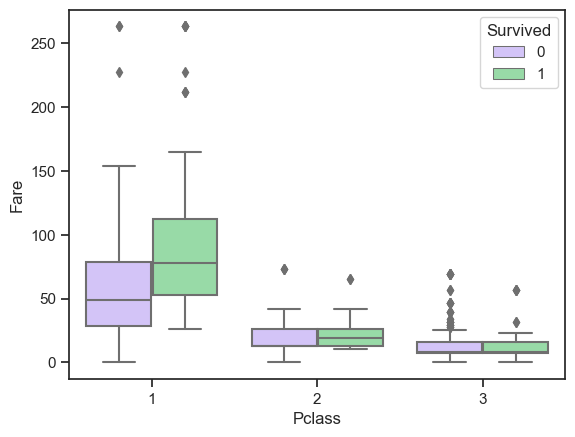

In [22]:
# Check correlation of `Pclass` and `Fare` against `Survived` T/F
corr2_check = pd.concat([y_train, X_train[["Pclass","Fare"]]], axis=1)
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="Pclass", y="Fare",
            hue="Survived", palette=["m", "g"],
            data=corr2_check)

`Pclass` and `Fare` appear strongly correlated via this boxplot. Moreover, in terms of `Survived`, there only appears to be a significant shift when `Pclass`==$1$ <i>and</i> `Fare` is higher, and `Pclass`==2 has demonstrates its quantiles along higher `Fare` when `Survived`==1 as well. `Pclass`==3 and `Fare` do not show as significant a disparity between `Survived` preconditions. Given the apparent correlation between `Pclass` and `Fare`, this evidence suggests that two variables are <b>not</b> conditionally independent to `Survived`. Since `Fare` is continuous and demonstrates a stronger relationship to `Survived` between the `Pclass` variables, we'll drop `Pclass` in favor of retaining `Fare`.

Finally, we'll check correlation between our remaining variables against `Survived`.

In [23]:
# Drop final irrelevant features
X_train = X_train.drop(['Pclass'], axis=1)
X_test = X_test.drop(['Pclass'], axis=1)
X_train.sample(5)

,Sex,Age,Fare,Embarked,qty_family,has_cabin
662,male,47.0,25.5875,S,0,True
860,male,41.0,14.1083,S,0,False
180,female,NaN,69.5500,S,6,False
575,male,19.0,14.5000,S,1,False
827,male,1.0,37.0042,C,1,False


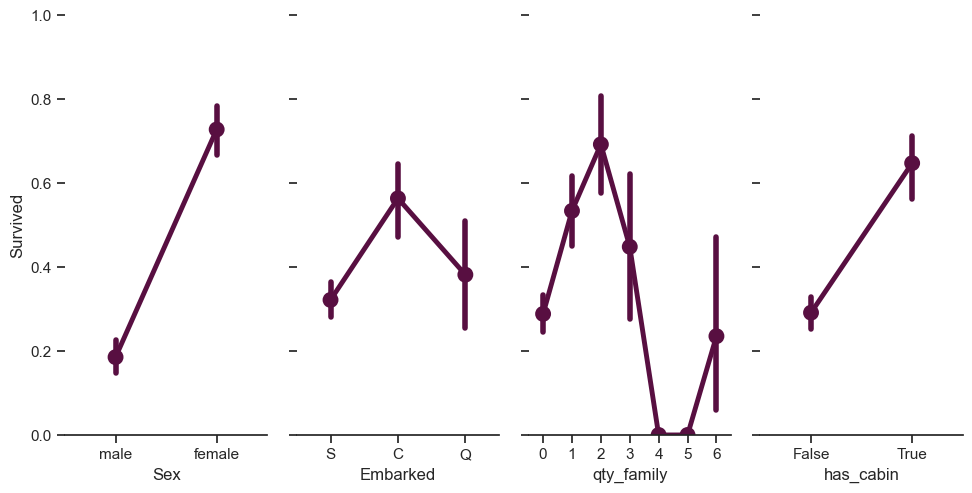

In [24]:
# Set up a grid to plot survival probability against all categorical variables
corr_check = pd.concat([y_train, X_train], axis=1)
g = sns.PairGrid(corr_check, y_vars="Survived",
                 x_vars=["Sex","Embarked","qty_family","has_cabin"],
                 height=5, aspect=.5)
# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

This plot suggests:
- the probability of survival for women was much higher than that of men at nearly 4:1
- the probability of survival for passengers who had cabins was much higher at nearly 3:1
- the probability of survival for those who embarked at location C was higher than Q, and S had the smallest variance
- the probability of survival for passengers who had 2 family members on board was much higher than that of solo passengers, and those with 4-5 members had none

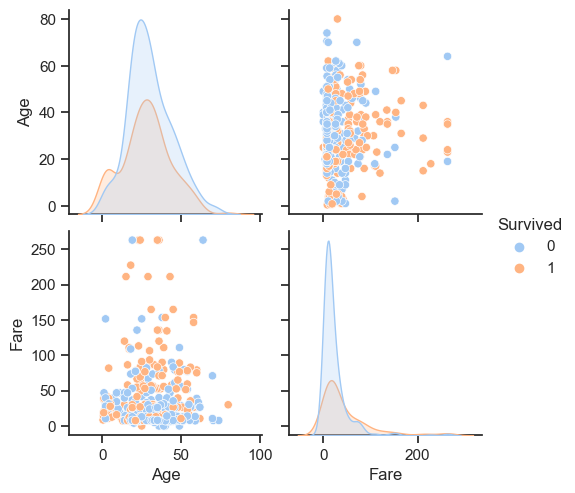

In [25]:
# Determine further possible correlation between continuous variables
corr2_check = pd.concat([y_train, X_train[["Age","Fare"]]], axis=1)
sns.pairplot(corr2_check, hue="Survived");

`Age` appears normally distributed among the survived and the deceased. `Fare` represents a lognormal probability density function with $\mu(0)$,$\sigma(1)$ among the survived and with $\mu(0)$,$\sigma(2)$ among the deceased.

> 4. Figure out if there are any missing values in the explanatory variables you want to use and either delete those passengers from the data set or fill in the missing values. If a numerical variable has missing values, you might fill those in with the average or median of that variable. If a categorical variable has missing values, you might fill those in using the most common value. You can create your own script for missin gvalues or you can use `sklearn SimpleImputer`.

In [26]:
# Check for blank values
X_train.isna().sum()+X_test.isna().sum()

Sex             0
Age           177
Fare            0
Embarked        2
qty_family      0
has_cabin       0
dtype: int64

`Embarked` and `Age` have missing values.

In [27]:
# Investigate `Embarked`==NaN to see if we can find related family members
df[df.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [28]:
# Investigate `Embarked`==NaN to see if we can find related docking locations among nearby cabins
df[df["Cabin"].apply(lambda x: 'B2' in str(x)) | df["Cabin"].apply(lambda x: 'B3' in str(x))].Embarked.value_counts()

Embarked
S    6
C    5
Name: count, dtype: int64

We narrowed it down to "not Q". We'll opt to use the most frequently-occuring value (the mode).

In [29]:
# Investigate `Embarked` to observe the most frequent value
print(f'Mode :: {df.Embarked.mode().values[0]}')
df.Embarked.value_counts()/df.Embarked.size

Mode :: S


Embarked
S    0.722783
C    0.188552
Q    0.086420
Name: count, dtype: float64

In [30]:
# Change the 2 values where `Embarked` is NaN
X_train.loc[X_train.Embarked.isna(),'Embarked'] = df.Embarked.mode().values[0]
X_test.loc[X_test.Embarked.isna(),'Embarked'] = df.Embarked.mode().values[0]

# Check for blank locations
X_train.isna().sum()+X_test.isna().sum()

Sex             0
Age           177
Fare            0
Embarked        0
qty_family      0
has_cabin       0
dtype: int64

Since `Age` is continuous, we'll use `SimpleImputer` to apply mean-valued imputations.

In [31]:
# Fill in missing values for `Age` (continuous)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean').fit(X_train[['Age']])
X_train['Age'] = imputer.transform(X_train[['Age']])
X_test['Age'] = imputer.transform(X_test[['Age']])

# Check for blank locations
X_train.isna().sum()+X_test.isna().sum()

Sex           0
Age           0
Fare          0
Embarked      0
qty_family    0
has_cabin     0
dtype: int64

> 5. Convert the categorical variables to numerical using encoding.

In [32]:
# Demonstrate the column data types
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 445 to 102
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         623 non-null    object 
 1   Age         623 non-null    float64
 2   Fare        623 non-null    float64
 3   Embarked    623 non-null    object 
 4   qty_family  623 non-null    int64  
 5   has_cabin   623 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(2)
memory usage: 46.0+ KB


In [33]:
# Assign pipeline tasks for encoding the features
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Binarizer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), make_column_selector(dtype_include=np.number)),
    ('cat', OneHotEncoder(), make_column_selector(dtype_include=object)),
    ('bool', Binarizer(threshold=0.5), make_column_selector(dtype_include=bool))])
preprocessor.fit(X_train)
# Preprocess the feature data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)
print(f'\nSample observation after feature conversion ::\n'
      f'{X_train_processed[np.random.randint(X_train_processed.shape[0], size=1)[0],:]}')


Sample observation after feature conversion ::
[1.28635483 1.16288133 0.11285234 0.         1.         1.
 0.         0.         1.        ]


DataFrame variables pandas → NumPy conversion indices
- `Age` :: X[:,0] :: range(-2.21539435, 3.89845382)
- `Fare` :: X[:,1] :: range(-0.73374975, 5.56440648)
- `qty_family` :: X[:,2] :: range(-0.59731945, 3.6637113)
- `Sex` :: X[:,3:4] :: range(0.0, 1.0)
- `Embarked` :: X[:,5:7] :: range(0.0, 1.0)
- `has_cabin` :: X[:,8] :: range(False, True)

In [34]:
# Preprocess the target data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_processed, y_train_processed = smote.fit_resample(X_train_processed, y_train)
print(f'\nClass labels after upsampling ::\n'
      f'{np.unique(y_train_processed, return_counts=True)}\n')


Class labels after upsampling ::
(array([0, 1], dtype=int64), array([392, 392], dtype=int64))



In [35]:
## << --- CHECKPOINT --- >>
X_train_OG = X_train.copy()
y_train_OG = y_train.copy()

# Save the tensor data to h5 file for later use
import h5py
hf = h5py.File('generated_files/HW8_Hinrichs_data.h5', 'w')
hf.create_dataset('X_train', data=X_train_processed)
hf.create_dataset('X_test', data=X_test_processed)
hf.create_dataset('y_train', data= y_train_processed)
hf.create_dataset('y_test', data=y_test)
hf.close()

# Save the preprocessing pipeline object to pickle file
import joblib
joblib.dump(preprocessor, 'generated_files/HW8_Hinrichs_data.pkl')

['generated_files/HW8_Hinrichs_data.pkl']

In [36]:
# Store preprocessing fitters (for later use)
age_pp = preprocessor.transform(X_train)[:,0]
fare_pp = preprocessor.transform(X_train)[:,1]
qfam_pp = preprocessor.transform(X_train)[:,2]
sex_pp = preprocessor.transform(X_train)[:,3:4]
emb_pp = preprocessor.transform(X_train)[:,5:7]
cab_pp = preprocessor.transform(X_train)[:,8]

# Save the tensor data to h5 file for later use
import h5py
hf = h5py.File('generated_files/HW8_Hinrichs_pp_data.h5', 'w')
pp_group = hf.create_group('preprocessors')
pp_group.create_dataset('age_pp', data=age_pp)
pp_group.create_dataset('fare_pp', data=fare_pp)
pp_group.create_dataset('qfam_pp', data=qfam_pp)
pp_group.create_dataset('sex_pp', data=sex_pp)
pp_group.create_dataset('emb_pp', data=emb_pp)
pp_group.create_dataset('cab_pp', data=cab_pp)
hf.close()

---

<center><h2>NaïveBayes Modeling</h2></center>

---

In [37]:
## << --- CHECKPOINT --- >>
# Import pre-processed tensor data from 'h5' file
import h5py
import numpy as np
hf = h5py.File('generated_files/HW8_Hinrichs_data.h5', 'r')
X_train = np.array(hf['X_train'])
X_test = np.array(hf['X_test'])
y_train = np.array(hf['y_train'])
y_test = np.array(hf['y_test'])
hf.close()

# Import pre-processed pipeline object from pickle file (needs fitting)
import joblib
preprocessor_import = joblib.load('generated_files/HW8_Hinrichs_data.pkl')


Training Shape :: (784, 9)
Training Labels :: (784,)

Testing Shape :: (268, 9)
Testing Labels :: (268,)

Training Features ::
[[-0.27 -0.32 -0.29  1.    0.    1.    0.    0.    1.  ]
 [-2.02 -0.28  0.82  0.    1.    0.    0.    1.    0.  ]
 [-2.02 -0.33  0.37  0.    1.    0.    0.    1.    0.  ]
 [-0.79 -0.02 -0.6   1.    0.    0.    0.    1.    1.  ]
 [-0.25 -0.24  0.11  0.    1.    0.    0.    1.    0.  ]]



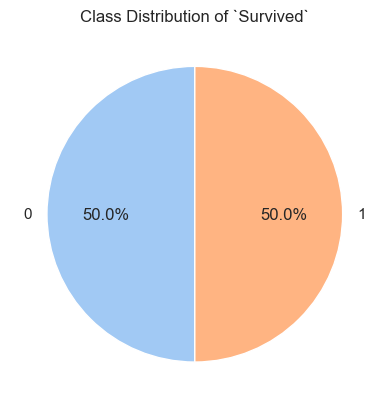

In [38]:
# Report the dataset shapes
print(f'\nTraining Shape :: {X_train.shape}')
print(f'Training Labels :: {y_train.shape}')
print(f'\nTesting Shape :: {X_test.shape}')
print(f'Testing Labels :: {y_test.shape}\n')

# Feature variable analysis
print(f'Training Features ::\n'
      f'{np.round(X_train[np.random.randint(X_train.shape[0], size=5), :],2)}\n')

# Target variable analysis
unique_labels, label_counts = np.unique(y_train, return_counts=True)
import matplotlib.pyplot as plt
plt.pie(label_counts, labels=unique_labels, autopct='%.1f%%', startangle=90)
plt.title("Class Distribution of `Survived`");

> 6. Build a model on the training data. You can create your own code or use `sklearn NaïveBayes`. If you use a mix of continuous and categorical explanatory variables, think of how you can build the model.

In [39]:
# # Implement Laplace Smoothing to eliminate zeroes  <<-- how to apply this??
# from sklearn.metrics.pairwise import laplacian_kernel
# k = laplacian_kernel(X_train, y_train)
# k

In [40]:
# Implement Laplace Smoothing to eliminate zeroes
alpha = 1.0e-10

# Find zeroes & add alpha
X_train[np.where(X_train==0)] += alpha
X_train[X_train==0].sum()

0.0

In [41]:
# Build the Naive Bayes model
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

# Fit the Naive Bayes model on the preprocessed data
nb_model.fit(X_train, y_train)

# Report the fit of the model
nb_model.score(X_train, y_train)

0.7869897959183674

> 7. Inspect the evaluation measures (accuracy score, confusion matrix, classification report).

In [42]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate the prediction accuracy of the model
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy}')

# Generate the classification report
print(f'\nClassification Report:\n'
      f'{classification_report(y_test, y_pred)}')

# Generate the confusion matrix
print(f'Confusion Matrix:\n'
      f'{confusion_matrix(y_test, y_pred)}')


Accuracy: 0.7910447761194029

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       157
           1       0.74      0.77      0.75       111

    accuracy                           0.79       268
   macro avg       0.78      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268

Confusion Matrix:
[[126  31]
 [ 25  86]]


> 8. Take some values for the explanatory variables and use your model to predict if that person would have survived or not.

In [44]:
# Define transformers for model prediction
preprocessor.fit(X_train_OG)

# Let the user enter some test feature values
feature_names = [col for col in X_train_OG.columns]
user_X = list()
for index, variable in enumerate(feature_names):
    if index==int(0) or index==int(3):
        pick_var = set(X_train_OG[variable])
        print(f'\nEnter a value {[str(v) for v in pick_var]} for `{variable}`: ')
        user_x = str(input('')) if index==int(0) else str(input('')).capitalize()
    elif index==int(1) or index==int(2) or index==int(4):
        min_var, max_var = X_train_OG[variable].min(), X_train_OG[variable].max()
        print(f'\nEnter a value ranged {min_var} to {max_var} for `{variable}`: ')
        user_x = float(input(''))
        user_x += alpha
    else:
        print(f'\nEnter a value {int(1)} for `True` or {int(0)} for `False` for `{variable}`: ')
        user_x = bool(input(''))
    # Find zeroes & add alpha
    user_X.append(user_x)
import pandas as pd
user_X = pd.DataFrame([user_X], columns=feature_names)

# Run a sample test predictions based on user-inputted features
import warnings
warnings.filterwarnings("ignore")  # suppress 'valid feature names' warning
user_X_processed = preprocessor.transform(user_X) # preprocess the feature data
prediction = nb_model.predict(user_X_processed)[0]
predicted = str('TRUE') if prediction==int(1) else str('FALSE')
print(f'\nThe probability of `Survived` predicted for a person with those parameters is {predicted}\n')


Enter a value ['female', 'male'] for `Sex`: 


 male



Enter a value ranged 0.42 to 80.0 for `Age`: 


 1



Enter a value ranged 0.0 to 263.0 for `Fare`: 


 10



Enter a value ['Q', 'S', 'C'] for `Embarked`: 


 q



Enter a value ranged 0 to 6 for `qty_family`: 


 6



Enter a value 1 for `True` or 0 for `False` for `has_cabin`: 


 0



The probability of `Survived` predicted for a person with those parameters is FALSE

